# One-Hot Encoding
- 토큰을 벡터로 변화하는 가장 일반적이고 기본적인 방법 
- 모든 단어에 고유한 정수 인덱스를 부여 ➡️ 정수 인덱스 i를 크기가 N(어휘 사전의 크기)인 이진 벡터로 변환 ➡️ **i번째 원소만 1이고 나머지는 모두 0**
- 희소행렬(Sparse Matrix) : 존재하는 단어의 인덱스를 제외하고 전부 0으로  표현 
  - 고차원에 해당되며, 단어의 유사성을 표현할 수 없음 

In [1]:
# word- level one-hot encoding 
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 사전 제작 
token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index)+1

max_length = 10 

# tokenize 
results = np.zeros(shape=(len(samples), max_length, max(token_index.values())+1))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i,j, index] = 1.

In [2]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [3]:
# character-level, one-hot encoding 
import string 

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters)+1), characters))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys())+1))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i,j, index] = 1.

In [4]:
results

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

- One-hot hashing 
  - 어휘 사전에 있는 고유한 토큰의 수가 너무 커서 모두 다루기 어려울 때 사용 
  - 각 단어에 명시적으로 인덱스를 할당 ➡️ 단어를 해싱해 고정된 크기의 벡터로 변환 
  - 단점 : 해시 충돌(hash conflict)의 문제가 있음 

✔️ Feature Hashing 
- Hash 함수를 활용하여 여러개의 feature를 정해진 차원의 벡터로 표현 하는 방법 
- feature 개수가 많아서 피처 개수를 압축하는 방법 


In [6]:
# Word-level one-hot encoding with hash trick 

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000
max_length = 10

results= np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality
    results[i,j, index] = 1.

- Keras 사용 

In [10]:
# using Keras for word-level one-hot encoding 
# to_categorical()사용 

from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(samples)

# texts_to_sequences : 이진 행렬 형태로 인코딩
sequences = tokenizer.texts_to_sequences(samples)
print(f'sequences:{sequences}\n')
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' %len(word_index))

sequences:[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

Found 9 unique tokens.


# Embedding
- 밀집행렬(Dense Matrix) : 각 단어의 관계를 실수로 표현, 저차원에 해당 

#### 단어 임베딩을 만드는 방법 
- 관심 대상인 문제와 함께 단어 임베딩을 학습
- 다른 머신러닝 작업에서 미리 계산된 단어 임베딩을 로드 ➡️ 사전 훈련된 단어 임베딩(pre-trained word embedding)

### IMDB movie-review sentiment prediction 🎬
- 데이터 준비 
  - 영화 리뷰에서 가장 빈도가 높은 1만개의 단어를 추출 
  - 리뷰에서 20개 단어 이후는 버림 

In [19]:
from keras.datasets import imdb
from keras import preprocessing

In [20]:
# 1만개 단어, 20개 단어 버림 
max_features = 1000
maxlen = 20

- pad_sequences( ) 
 - Embedding층을 사용하기 위해서는 시퀀스 데이터의 길이가 동일해야함 
 - 지정해준 길이보다 짧은 경우 0을 채워주며 긴 경우 잘라낸다 

In [21]:
# 데이터 불러오기 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

- IMDB 데이터셋에서 가장 빈번하게 사용되는 세개의 단어 

In [22]:
imdb_get_word_index = {}

for key,value in imdb.get_word_index().items():
  imdb_get_word_index[value] = key

for i in range(1,4):
  print(f'{i}번째로 가장 많이 쓰는 단어 = {imdb_get_word_index[i]}')

1번째로 가장 많이 쓰는 단어 = the
2번째로 가장 많이 쓰는 단어 = and
3번째로 가장 많이 쓰는 단어 = a


- 모델 구성하기 🧩
  - Embedding 층은 모델의 **첫 번째 층**으로만 사용 할 수 있음 
    - 입력 : (batch_size, sequence_length)
    - 출력 : (batch_size, sequence_length, output_dim)

In [27]:
# 모델 생성 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()

# Flatten층을 사용하기 위해서 input_length를 전달 
model.add(Embedding(input_dim = max_features, output_dim = 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             8000      
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 8,161
Trainable params: 8,161
Non-trainable params: 0
_________________________________________________________________


- validation_split : 학습 데이터의 끝에 해당 비율만큼 떼어내어 검증 데이터 셋으로 활용 

In [29]:
# 모델 학습 
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6711 - acc: 0.6169 - val_loss: 0.6261 - val_acc: 0.6922
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5671 - acc: 0.7246 - val_loss: 0.5495 - val_acc: 0.7146
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5103 - acc: 0.7484 - val_loss: 0.5302 - val_acc: 0.7264
Epoch 4/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4887 - acc: 0.7603 - val_loss: 0.5301 - val_acc: 0.7302
Epoch 5/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4777 - acc: 0.7665 - val_loss: 0.5277 - val_acc: 0.7328
Epoch 6/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4694 - acc: 0.7727 - val_loss: 0.5298 - val_acc: 0.7338
Epoch 7/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4621 - acc: 0.7782 - val_loss: 0.5340 - val_acc: 0.7294
Epoch 8/10
625/625 [==============================] - 1s 1ms/step - loss: 0.

- 모델 평가하기 

In [33]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.5314 - acc: 0.7330


[0.5313838124275208, 0.7329599857330322]

In [30]:
# 정확성 확인 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs = range(1, len(acc)+1)

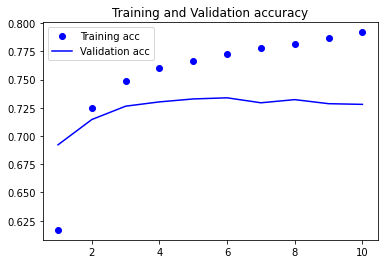

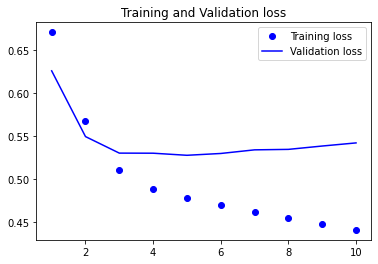

<Figure size 432x288 with 0 Axes>

In [31]:
# accuracy 그래프 
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

# loss 그래프 
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()
plt.show()